#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

In [10]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def rand(start,end,num):
  r = []
  for _ in range(num):
    r1 = random.randint(start*1000,end*1000) 
    r2 = float(r1)/1000.0
    r.append(r2)
  return r

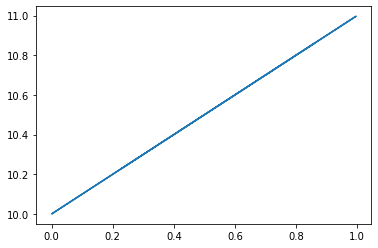

In [11]:
x = rand(0,1,1000)              # Generating random 1000 numbers from 0 to 1
x = np.asarray(x)               # Array assignment
w0 = 10 ; w1 = 1                
y = w0 + (w1*x)
plt.plot(x,y)  
plt.show()              

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

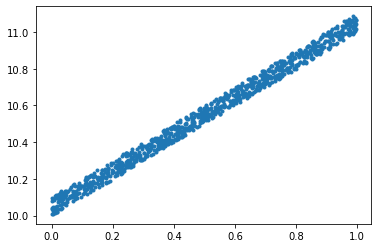

In [12]:
noise = rand(0,1,1000)                        # Addition to noise
noise = np.asarray(noise)                     # Array Assignment
y_cor = w0 + w1*x + 0.1*noise                 # Addition of noise to y_cor curve
plt.scatter(x, y_cor, marker='.')             # Plot curve
plt.show()

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

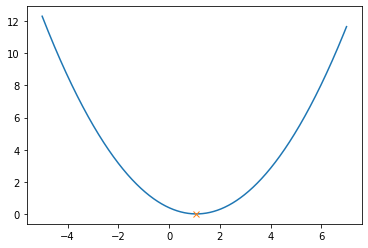

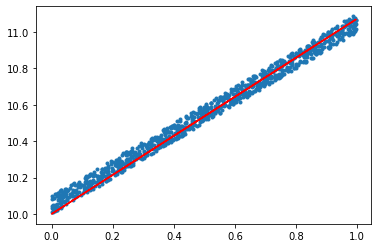

In [13]:
def uniform(start_index, end_index, number):                                        # Uniform function starting from start index to end index [Works same as linspace function]
  r = []
  for i in range(number):
    r1 = float(start_index) + i*(float(end_index-start_index)/float(number))        # Basically we are normalising here [start += i * (size/number)]
    r.append(r1)                                                              
  return r                                                                          # Final dataset returned

w0 = 10
w_1 = uniform (-5,7,1000)
w_1 = np.array(w_1)
best_w1 = w_1[0]                                                                    # After all iterations, selecting 1st index value
error_least = float('inf')                                                          # Unbounded upper value for comparison for error
error = []                                                                          
for w1 in w_1:                                                                      # Loop for calculating error
  y_pred = w0 + w1*x
  error1 = np.sum((y_pred - y_cor)**2) / 1000.0
  error.append(error1)
  if error1 < error_least:                                                          # Error Constraint
    error_least = error1                                            
    best_w1 = w1

y_pred = w0 + best_w1*x                                                             # Best Curve chosen

plt.plot(w_1, error)                                                                
plt.plot(best_w1, error_least, marker = 'x')                                        # For minima
plt.show()

plt.scatter(x, y_cor, marker='.')
plt.plot(x, y_pred, 'r')                                                            # Regression Curve
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

In [14]:
# write your code here
def gradient_descent(params,epsilon,x,y,alpha,indexes):                             # Making a function for Gradient Descent [Parameters, Epsilon,x,y, indexes]
  x1 = np.ones((x.shape[0],x.shape[1]+1))                                           
  x1[:,1:] = x
  x = x1
  num = len(y)
  para = [];  error = []                                                            # Creating array for parameters
  error1 = 1000001.                                                                 # Setting Error1, Error2, to minimize epsilon gap
  error2 = 1000000.
  epoch = 0                                                                         # Number of iterations we need
  while abs(error1-error2) > epsilon:                                               # Loop for error calculation
    epoch += 1
    y_pred = np.dot(x,params.transpose())
    error1 = np.sum((y-y_pred)**2)/num
    error.append(error1)
    
    del_error = []                                                                  # Dropping the errors after iterations
    for i in range((params.size)):
      if i in indexes:
        x_i = x[:,i].reshape(num,1)
        del_error_i = -(np.sum(np.dot((y-y_pred).transpose(),x_i)))/num
        del_error.append(del_error_i)
      else :
        del_error_i = 0
        del_error.append(del_error_i) 

    del_error = np.array(del_error)                                     
    params = params - alpha * del_error                                             # Moving towards Convergence

    para.append(params)
    
    y_pred = np.dot(x,params.transpose())
    error2 = np.sum((y-y_pred)**2)/num
    
  para = np.array(para)
  error = np.array(error)
  return params,para,error,epoch

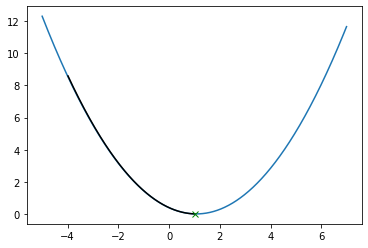

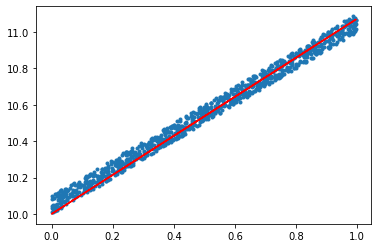

In [16]:
w = np.array([[10,-4]])
num = 1000 ; alpha = 0.01                                                           # 0.9 
x = x.reshape(num,1)
y_cor = y_cor.reshape(num,1)
#print(len(y))

epsilon = 0.00001000
indexes = [1]

w,w1,e1,epoch = gradient_descent(w,epsilon,x,y_cor,alpha,indexes)                   # Function passed with our dataset
#print(w)
w1 = w1.reshape(epoch,2)

plt.plot(w_1,error)                                                                 # 1st Graph with gradient descent
plt.plot(w1[:,1],e1,'black')
plt.plot(w[:,1],e1[epoch-1],'green', marker = 'x')
plt.show()

plt.scatter(x,y_cor,marker='.')                                                     # Same graph shown above
plt.plot(x,y_pred,'r')
plt.show()

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

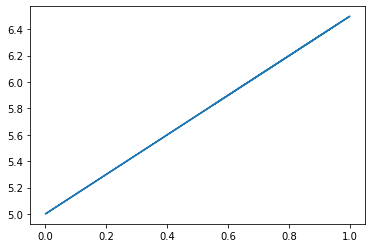

In [17]:
x = rand(0,1,1000)
x = np.array(x)
w_0 = 5 ; w_1 = 1.5
y = w_0 + w_1*x
plt.plot(x,y)
plt.show()

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

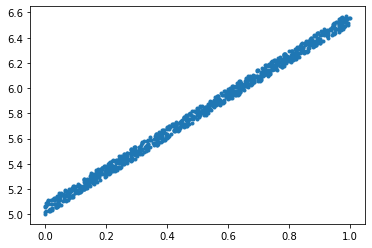

In [18]:
noise = rand(0,1,1000)
noise = np.asarray(noise)
y_cor = w_0 + w_1*x + 0.1*noise
plt.scatter(x,y_cor,marker='.')
plt.show()

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

(1000, 1000)


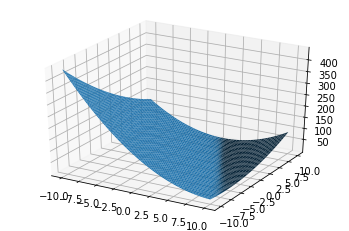

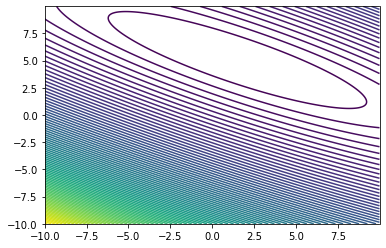

In [19]:
import mpl_toolkits.mplot3d                                                        # Matplot Library

# write your code here
w0 = uniform(-10,10,1000)                                                          # w1 & w0 taken from -10 to 10 [1000 samples]
w1 = uniform(-10,10,1000)
error = []

for w_0 in w0:                                                                     # Error calculation
  e2 = []
  for w_1 in w1:
    y1 = w_0 + w_1*x 
    e1 = np.sum((y_cor-y1)**2)/num
    e2.append(e1)
  error.append(e2)

error = np.array(error)                                                     
print(error.shape)                                                                 # Final dimensions of error (1000 x 1000) chosen from above

w_0, w_1 = np.meshgrid(w0, w1)


ax = plt.axes(projection='3d')                                                     # 3D plot
ax.plot_surface(w_1, w_0, error)
plt.show()

plt.contour(w0, w1, error, levels = 100)                                           # 3D plot Contour
plt.show()

**Gradient Descent to find optimal Values**

[ 5.050065772754052 ] [ 1.5006764515815278 ]


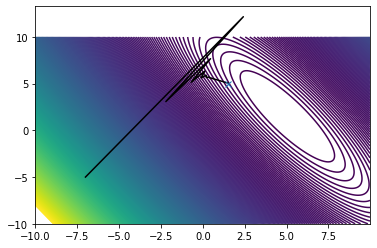

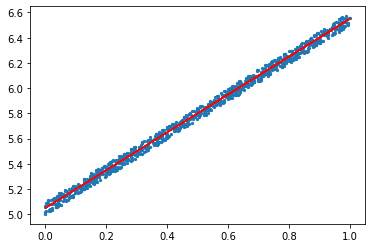

In [20]:
# Gradient descent
                                                                                      # initialization 
w1_init = -7 ; w0_init = -5
lr = 0.6                                                                              # learning rate (0.9 diverges, 0.6 quite interesting)
epsilon = 0.000001

# write your code here

plt.figure(1)
plt.contour(w_1, w_0, error,range(2,400))

temp0 = np.zeros((1000,1))
temp1 = np.zeros((1000,1))

w0 = -5 ; w1 = -7

for i in range(1000):
  y_pred = w0 + w1*x
  w0_d = (-2/1000)*np.sum(y_cor-y_pred)
  w1_d = (-2/1000)*np.sum(np.multiply((y_cor-y_pred), x))
  temp0[i,0] = w0
  temp1[i,0] = w1 
  w0 = w0 - lr*w0_d                                                                 # w0 := w0 - alpha*partial_der(w0)
  w1 = w1 - lr*w1_d                                                                 # w1 := w1 - alpha*partial_der(w1)

print('[',w0,']' ,'[', w1,']',)
plt.plot(temp1, temp0, 'black')
plt.plot(1.5, 5, marker='x')

plt.figure(2)
plt.scatter(x, y_cor, s=5)
plt.plot(x, y_pred, 'red')
plt.show()

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

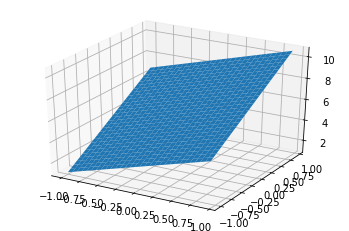

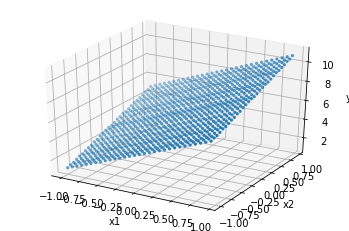

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def uniform(start_index,end_index,number):                                          # Same Uniform Function as before
  r = []
  for i in range(number):
    r1 = float(start_index) + i*(float(end_index-start_index)/float(number))
    r.append(r1)
  return r

x1 = uniform(-1,1,30)
x2 = uniform(-1,1,30)
x1 = np.asarray(x1)
x2 = np.asarray(x2)
w0 = 6 ; w1 = 2 ; w2 = 3                                                            # w0,w1,w2 randomly chosen
y = []

for x_1 in x1:
  y1 = []
  for x_2 in x2:
    y1.append(w0 + w1*x_1 + w2*x_2)                                                 # Finding corresponding y
  y.append(y1)
y = np.array(y)

X1, X2 = np.meshgrid(x1, x2)                                                        # Fixing Meshgrid
Y = w0 + X1*w1 + X2*w2                                                              # Plane Eqn

ax = plt.axes(projection='3d')                                                      # Graph Plot
ax.plot_surface(X1, X2, Y)
plt.show()

y_c = []

for i in range(len(y)):                                                             # Plotting for the mesh
  rn = np.random.random()
  y_c.append(y[i]+0.1*rn)

fig = plt.figure(2)
ax = fig.gca(projection='3d')

ax.set_xlabel('x1')                                                                 # Mesh labels and plot
ax.set_ylabel('x2') 
ax.set_zlabel('y')
ax.scatter(X1,X2,y_c,s=5)
plt.show()


**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

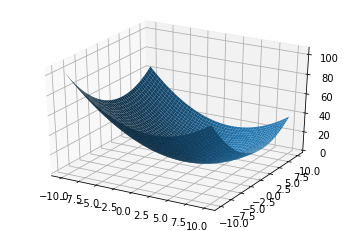

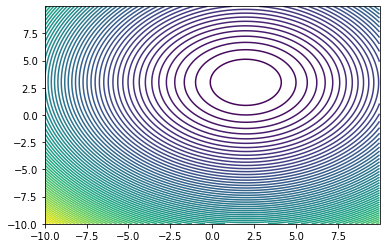

In [22]:
w1 = uniform(-10,10,1000)                                                         # w1 ranges
w2 = uniform(-10,10,1000)                                                         # w2 ranges  

error = []
for w_1 in w1:
  e2 = []
  for w_2 in w2:                                                                  # loop for error
    y1 = w0 + w_1*X1 +w_2*X2 
    e1 = np.sum((y-y1)**2)/900
    e2.append(e1)
  error.append(e2)
error = np.array(error)

w_1, w_2 = np.meshgrid(w1, w2)

ax = plt.axes(projection='3d')                                                     # 3-D plot
ax.plot_surface(w_1,w_2, error)
plt.show()

plt.contour(w_1,w_2,error,70)                                                      # Contour Plot
plt.show()

**Prediction using Gradient Descent**

(30, 30)
(900, 2)
[5.         0.98482099 1.98707424]
180


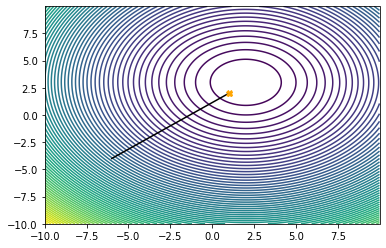

In [23]:
y = w0 + 1*X1 + 2*X2                                                                # Plane defined  
print(y.shape)

xnew = [X1.reshape(900,1),X2.reshape(900,1)]          
xnew = np.array(xnew).reshape(900,2)
ynew = y.reshape(900,1)

print(xnew.shape)                                                                   # Parameters for Gradient Descent defined
w = np.array([5.,-6.,-4.])
epsilon = 0.00001
lr = 0.1
indexs = [1,2]

num = 900
w = np.array([5.,-6.,-4.])
epsilon = 0.00001
lr = 0.1
X1 = X1.reshape(900,1)
X2 = X2.reshape(900,1)
y = w[0] + 1*X1 +2*X2
error1 = 1000001.
error2 = 1000000.
error_gd=[]
w1=[] ; w2=[]
epoch = 0

while abs(error1-error2) > epsilon:                                                 # Gradient Descent Implementation
    epoch += 1
    y_pred = w[0] + w[1]*X1 + w[2]*X2
    w1.append(w[1])
    w2.append(w[2])
    error1 = np.sum((y-y_pred)**2)/num
    error_gd.append(error1)
    del_error_1 = -(np.sum(np.dot((y-y_pred).T,X1)))/num
    del_error_2 = -(np.sum(np.dot((y-y_pred).T,X2)))/num
    w[1] = w[1] - lr * del_error_1
    w[2] = w[2] - lr * del_error_2
    y_pred = w[0] + w[1]*X1 + w[2]*X2
    error2 = np.sum((y-y_pred)**2)/num
print(w)
print(epoch)

plt.contour(w_1,w_2, error, levels = 70)                                              # Towards convergence
plt.plot(w1, w2, 'black')
plt.plot(w[1],w[2], 'orange', marker = 'X')
plt.show()

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.05125811]
 [1.99953448]
 [3.0003458 ]
 [5.00212959]
 [9.00124257]
 [2.99840872]]
[[1.05172741]
 [1.9750265 ]
 [2.88568101]
 [4.92074624]
 [8.80706851]
 [2.89800299]]


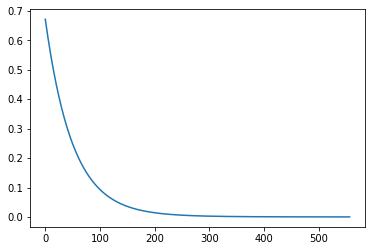

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    return (np.sum(y - (x.T@w)))/(y.shape[0])

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)

    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    epsilon = 0.000001
    w_old = np.random.rand(x.shape[0],1)
    error1 = 100001.
    error2 = 100000.
    err = []
    while (error1 - error2)>epsilon:
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err


############################################################################################################
# Generation of data
sim_dim = 5
sim_no_data = 1000
x = np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w = np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# augment feature

x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
nois = np.random.uniform(0, 1, y.shape)
y = y + 0.1*nois

### the data (x_aug and y is generated)#####
###############################################################################################################
# by computation (Normal equation)

reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradien descent

lr=0.01
w_pred,err = reg.Regression_grad_des(x_aug, y, lr)
print(w_pred)

plt.plot(err)
plt.show()


#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [25]:
from google.colab import drive
drive.mount('/gdrive')
!pip install idx2numpy

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [26]:
from google.colab import files 
import idx2numpy                                                   # Libraries
import pandas as pd

df =pd.read_csv('/gdrive/My Drive/salary_pred_data.csv')                                       # CSV file loaded
print(df.head)                                                                    # Print data for confirmation
#print("\nColumns: \n")                          
df.columns 

<bound method NDFrame.head of      Level of city  Years of experiance  ...  Job profile  Salary
0                2                   11  ...            3   41368
1                4                   14  ...            4   49756
2                1                   13  ...            2   34310
3                4                   19  ...            7   65294
4                2                   10  ...            6   55648
..             ...                  ...  ...          ...     ...
995              4                    5  ...            3   43878
996              2                    6  ...            4   45618
997              1                   18  ...            1   29750
998              4                    3  ...            3   43702
999              4                   14  ...            3   45416

[1000 rows x 6 columns]>


Index(['Level of city', 'Years of experiance', 'Age', 'Level of education',
       'Job profile', 'Salary'],
      dtype='object')

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = df[['Level of city', 'Years of experiance', 'Age', 'Level of education', 'Job profile']]    # x parameters defined
y = df[['Salary']]                                                                              # y parameter defined

x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)                                             
x_train,y_train,x_test,y_test = x[:900],y[:900],x[900:1000],y[900:1000]
reg = regression()                                                                              # Regression called

x_test = np.array(x_test)

w_pred = reg.mat_inv(y_train,x_train.T)                                                         # matrix operations done
print(x_test[0:3]@w_pred)
y_pred = x_test@w_pred
print(y_pred)

error = reg.error(w_pred,y_test,x_test.T)/((np.max(y_test)-np.mean(y_test))**2)                 # Error

print('Normalized testing error: ', error, '\n')
print('predicted salary: ', y_pred[0:3], '\n')
print('actual salary: ', y_test[0:3])

    Salary
0  33184.0
1  52740.0
2  58152.0
     Salary
0   33184.0
1   52740.0
2   58152.0
3   44292.0
4   50184.0
..      ...
95  43878.0
96  45618.0
97  29750.0
98  43702.0
99  45416.0

[100 rows x 1 columns]
Normalized testing error:  Salary    0.0
dtype: float64 

predicted salary:      Salary
0  33184.0
1  52740.0
2  58152.0 

actual salary:       Salary
900   33184
901   52740
902   58152


In [28]:
error = reg.error(w_pred,y_train,x_train.T)/((np.max(y_train)-np.mean(y_train))**2)     # Normalising Training Error

print('Normalized training error: ', error, '\n')

Normalized training error:  Salary   -4.577140e-19
dtype: float64 



In [30]:
## Write your code here
x_train = np.array(x_train, dtype = np.float64)                                         # X_train & Y_Train arrays defined
y_train = np.array(y_train, dtype = np.float64)

x_test = np.array(x_test, dtype = np.float64)                                           # X_test & Y_test arrays defined
y_test = np.array(y_test, dtype = np.float64)

w_pred_gd,err1 = reg.Regression_grad_des(x_train.T, y_train, 0.0001)                    # Gradient Descent
#print(w_pred_gd)
y_pred = x_test@w_pred_gd

error = reg.error(w_pred_gd,y_test,x_test.T)/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error: ', error, '\n')                                        # Predicted Values
print('predicted salary: ', y_pred[0:3], '\n')
print('actual salary: ', y_test[0:3])


Normalized testing error:  3.2451207687259845e-10 

predicted salary:  [[33184.15971029]
 [52738.9491586 ]
 [58150.5274922 ]] 

actual salary:  [[33184.]
 [52740.]
 [58152.]]


In [31]:
error = reg.error(w_pred_gd,y_train,x_train.T)/((np.max(y_train)-np.mean(y_train))**2)     # Normalising Training Error

print('Normalized training error: ', error, '\n')

Normalized training error:  2.6148045149904964e-10 

